In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
import sys
print(sys.executable)


/opt/anaconda3/envs/demandforecasting/bin/python


In [51]:
df = pd.read_csv("softdrinks_cleaned_timestamp.csv")

# EDA

In [52]:
df.head()

,store,week,upc,descrip,brand,pack,size,unit_price,unit_cost,margin_pct,units_sold,revenue,promo_flag,promo_code,profit,sale,start_date,end_date,specialEvents,timestamp
0,2,297,418,~DIET CRYSTAL PEPSI,PEPSI,NaN,24/12O,6.99,5.55,20.60,5,34.95,1,S,20.60,S,1995-05-18,1995-05-24,NaN,1995-05-18
1,2,357,418,~DIET CRYSTAL PEPSI,PEPSI,NaN,24/12O,4.79,7.70,-60.75,1,4.79,1,B,-60.75,B,1996-07-11,1996-07-17,NaN,1996-07-11
2,2,362,419,~CRYSTAL PEPSI 24 PA,PEPSI,NaN,24/12O,4.79,7.70,-60.75,1,4.79,1,B,-60.75,B,1996-08-15,1996-08-21,NaN,1996-08-15
3,2,363,419,~CRYSTAL PEPSI 24 PA,PEPSI,NaN,24/12O,4.79,5.95,-24.21,1,4.79,1,B,-24.21,B,1996-08-22,1996-08-28,NaN,1996-08-22
4,2,367,419,~CRYSTAL PEPSI 24 PA,PEPSI,NaN,24/12O,4.79,7.70,-60.75,1,4.79,1,B,-60.75,B,1996-09-19,1996-09-25,NaN,1996-09-19


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918702 entries, 0 to 1918701
Data columns (total 20 columns):
 #   Column         Dtype  
---  ------         -----  
 0   store          int64  
 1   week           int64  
 2   upc            int64  
 3   descrip        object 
 4   brand          object 
 5   pack           object 
 6   size           object 
 7   unit_price     float64
 8   unit_cost      float64
 9   margin_pct     float64
 10  units_sold     int64  
 11  revenue        float64
 12  promo_flag     int64  
 13  promo_code     object 
 14  profit         float64
 15  sale           object 
 16  start_date     object 
 17  end_date       object 
 18  specialEvents  object 
 19  timestamp      object 
dtypes: float64(5), int64(5), object(10)
memory usage: 292.8+ MB


## Numerical Features

In [54]:
pd.set_option('display.float_format','{:,.2f}'.format)
#pd.reset_option('display.float_format') #scientific notation
df.describe()

,store,week,upc,unit_price,unit_cost,margin_pct,units_sold,revenue,promo_flag,profit
count,"1,918,702.00","1,918,702.00","1,918,702.00","1,918,702.00","1,918,702.00","1,918,702.00","1,918,702.00","1,918,702.00","1,918,702.00","1,918,702.00"
mean,83.66,228.18,"3,655,467,949.13",2.43,2.35,8.55,60.94,117.86,1.00,8.55
std,36.88,110.71,"2,547,058,832.72",1.96,2.27,28.17,157.46,407.09,0.00,28.17
min,2.00,1.00,418.00,0.16,0.00,-99.99,1.00,0.16,1.00,-99.99
25%,56.00,144.00,"1,200,000,847.00",0.99,0.79,-4.83,7.00,11.90,1.00,-4.83
50%,89.00,235.00,"3,828,100,265.00",1.58,1.43,12.62,17.00,26.82,1.00,12.62
75%,114.00,326.00,"4,900,001,063.00",3.49,3.27,25.18,51.00,76.89,1.00,25.18
max,146.00,399.00,"71,370,525,000.00",7.19,10.30,99.99,"10,291.00","37,853.13",1.00,99.99


1. Store(store ids) and upc(product code) need to be treated as categorical
2. dataset spans across 7-8 years based on weeks column
3. unit price is skewed right, need to check for outliers
4. unit cost need to be checked for data errors or special products
5. need to clean margin percentage column for negative margins and outlier analysis to find high margins
6. units sold can be used to find top seller
7. revenue right skewed common in retail
8. promotion flag 1, why is every row flagged as promotion? dataset issue?
9. profits skewed

## Categorical Features

In [55]:
df.describe(include="object")

,descrip,brand,pack,size,promo_code,sale,start_date,end_date,specialEvents,timestamp
count,1918702,1918702,1348289,1918702,1918702,1918702,1918702,1918702,352606,1918702
unique,375,11,18,38,4,4,390,390,10,390
top,DIET PEPSI CAFFEINE,OTHER,2L,2 LT,S,S,1995-01-05,1995-01-11,Christmas,1995-01-05
freq,49122,1057739,604431,604431,974569,974569,13163,13163,45929,13163


In [56]:
df['descrip'].value_counts()

descrip
DIET PEPSI CAFFEINE     49122
DIET MOUNTAIN DEW       39129
BARQ'S ROOT BEER        33840
SPRITE                  33574
PEPSI COLA CANS         29999
                        ...  
ORANGINA DIET 4PK           2
CORR DRK CHOCOLATE N        2
OLD TYME CREAM SODA         2
NAT 90 CHOCOLATE SOD        1
NAT 90 DIET CHOC SOD        1
Name: count, Length: 375, dtype: int64

In [57]:
df['brand'].value_counts()

brand
OTHER           1057739
PEPSI            285694
COKE             198556
SPRITE           103074
MOUNTAIN DEW      99974
DR PEPPER         73378
SCHWEPPES         40258
COCA              38670
A&W               18436
RC                 2103
7UP                 820
Name: count, dtype: int64

In [58]:
# This tells us unique value counts for each categorical column like brand, descriptione etc. 

str_cols = df.select_dtypes(include='object')
value_counts_per_col = {col:str_cols[col].value_counts() for col in str_cols.columns}

for col, counts in value_counts_per_col.items():
    print(f"\nValue counts for {col}:\n{counts}")


Value counts for descrip:
descrip
DIET PEPSI CAFFEINE     49122
DIET MOUNTAIN DEW       39129
BARQ'S ROOT BEER        33840
SPRITE                  33574
PEPSI COLA CANS         29999
                        ...  
ORANGINA DIET 4PK           2
CORR DRK CHOCOLATE N        2
OLD TYME CREAM SODA         2
NAT 90 CHOCOLATE SOD        1
NAT 90 DIET CHOC SOD        1
Name: count, Length: 375, dtype: int64

Value counts for brand:
brand
OTHER           1057739
PEPSI            285694
COKE             198556
SPRITE           103074
MOUNTAIN DEW      99974
DR PEPPER         73378
SCHWEPPES         40258
COCA              38670
A&W               18436
RC                 2103
7UP                 820
Name: count, dtype: int64

Value counts for pack:
pack
2L      604431
12OZ    422855
20OZ     76016
16OZ     68480
1L       67777
3L       53081
10OZ     30213
24PK     19516
12PK      2212
6PK       1089
7OZ        667
28OZ       543
15PK       518
19OZ       338
8OZ        234
24OZ       162
32OZ  

## Missing Values

In [59]:
missing = df.isnull().sum()
missing

store                  0
week                   0
upc                    0
descrip                0
brand                  0
pack              570413
size                   0
unit_price             0
unit_cost              0
margin_pct             0
units_sold             0
revenue                0
promo_flag             0
promo_code             0
profit                 0
sale                   0
start_date             0
end_date               0
specialEvents    1566096
timestamp              0
dtype: int64

In [60]:
print(len(df))

1918702


In [61]:
missing_pct = (missing/len(df))*100
print(missing_pct)

store            0.00
week             0.00
upc              0.00
descrip          0.00
brand            0.00
pack            29.73
size             0.00
unit_price       0.00
unit_cost        0.00
margin_pct       0.00
units_sold       0.00
revenue          0.00
promo_flag       0.00
promo_code       0.00
profit           0.00
sale             0.00
start_date       0.00
end_date         0.00
specialEvents   81.62
timestamp        0.00
dtype: float64


## Duplicate Rows

In [62]:
df.duplicated().sum()

np.int64(0)

# Plots

In [67]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100
%matplotlib inline

In [68]:
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

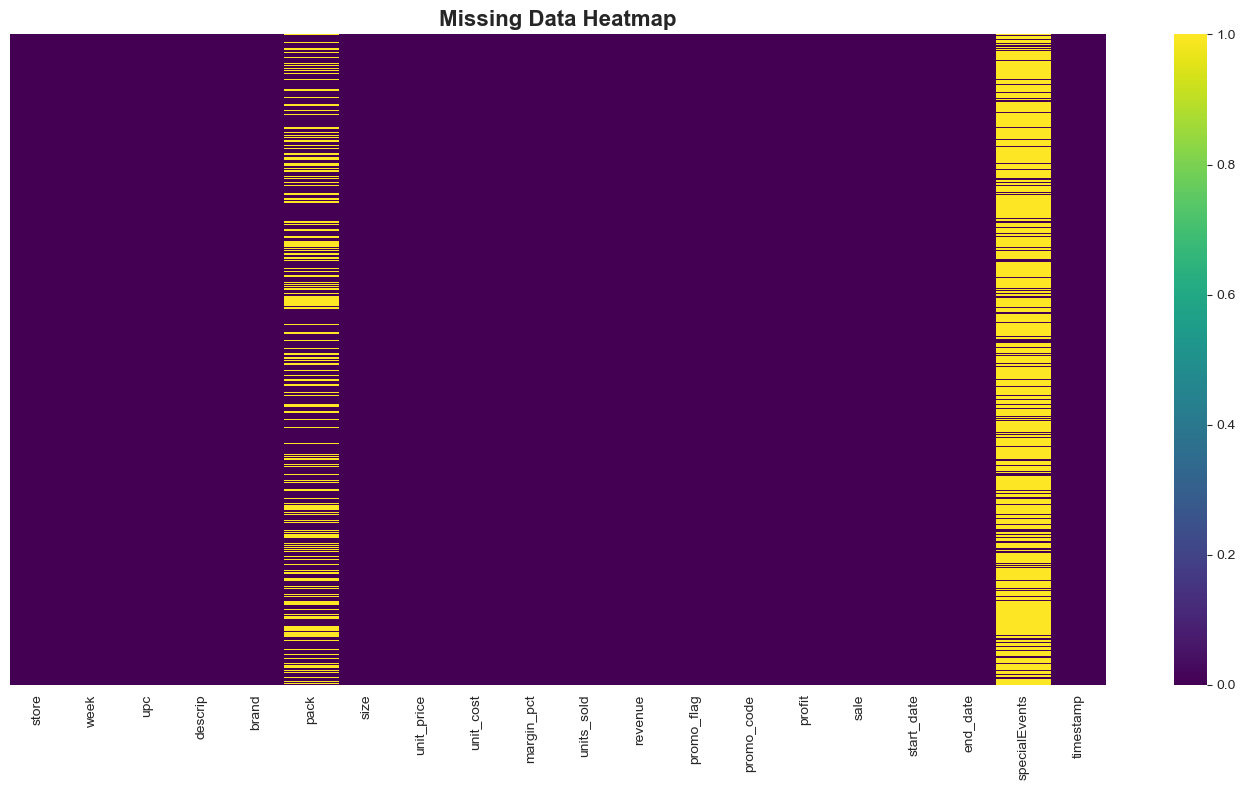

In [70]:
# OVERVIEW: Missing Data Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Data Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

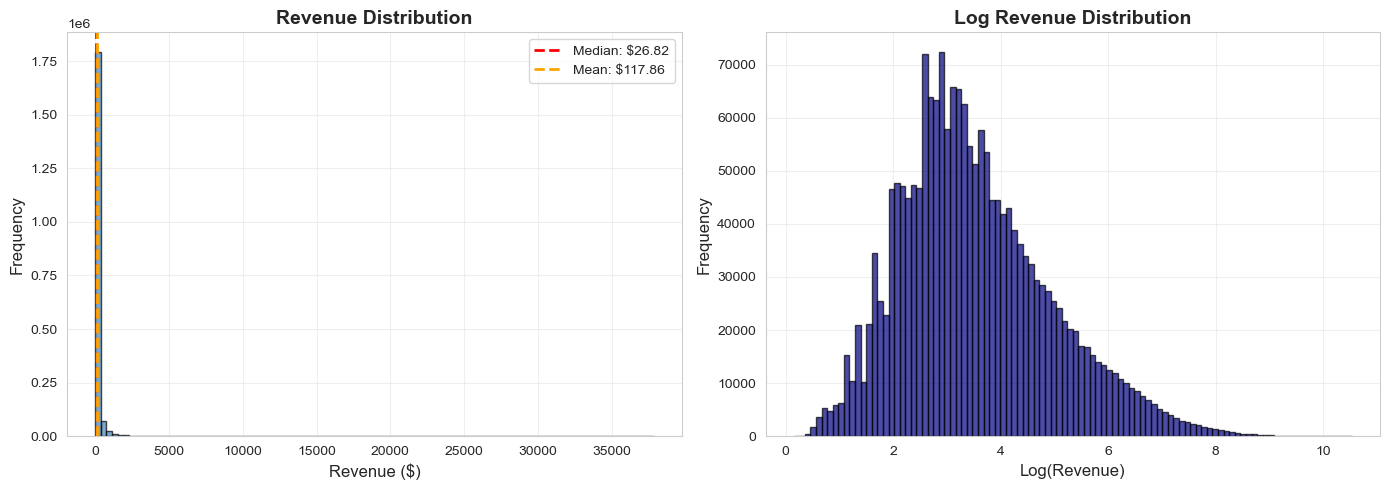

Revenue Statistics:
  Mean: $117.86
  Median: $26.82
  Std Dev: $407.09
  Min: $0.16
  Max: $37853.13


In [72]:
# Revenue
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(df['revenue'], bins=100, color='steelblue', edgecolor='black', alpha=0.7)
plt.axvline(df['revenue'].median(), color='red', linestyle='--', linewidth=2, 
            label=f'Median: ${df["revenue"].median():.2f}')
plt.axvline(df['revenue'].mean(), color='orange', linestyle='--', linewidth=2, 
            label=f'Mean: ${df["revenue"].mean():.2f}')
plt.xlabel('Revenue ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Revenue Distribution', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(np.log1p(df['revenue']), bins=100, color='navy', edgecolor='black', alpha=0.7)
plt.xlabel('Log(Revenue)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Log Revenue Distribution', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Revenue Statistics:")
print(f"  Mean: ${df['revenue'].mean():.2f}")
print(f"  Median: ${df['revenue'].median():.2f}")
print(f"  Std Dev: ${df['revenue'].std():.2f}")
print(f"  Min: ${df['revenue'].min():.2f}")
print(f"  Max: ${df['revenue'].max():.2f}")

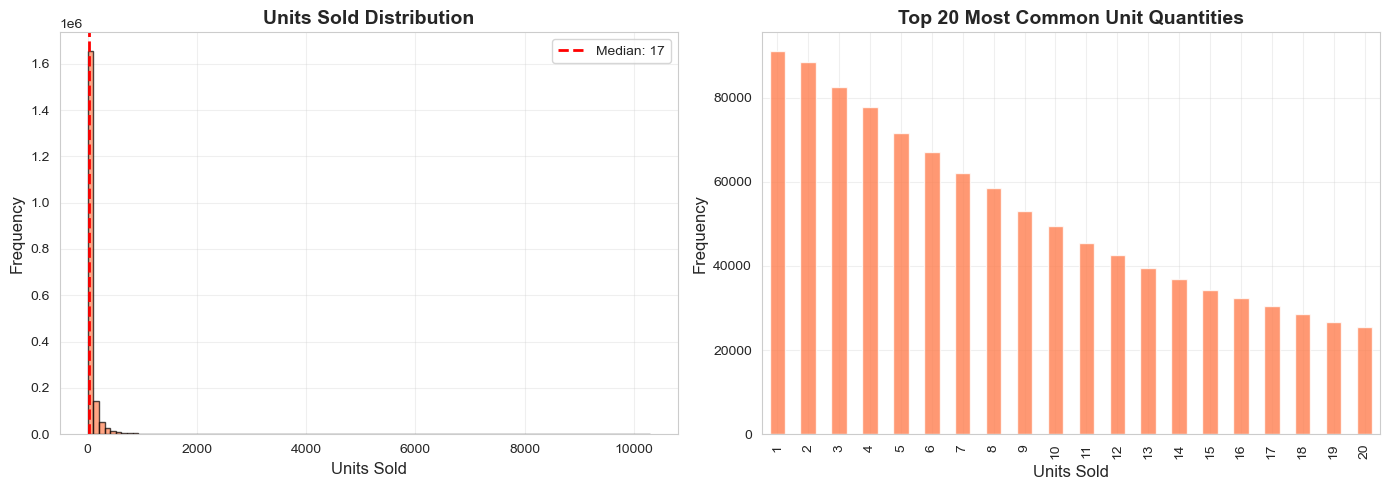

In [74]:
# Units Sold
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(df['units_sold'], bins=100, color='coral', edgecolor='black', alpha=0.7)
plt.axvline(df['units_sold'].median(), color='red', linestyle='--', linewidth=2, 
            label=f'Median: {df["units_sold"].median():.0f}')
plt.xlabel('Units Sold', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Units Sold Distribution', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
df['units_sold'].value_counts().head(20).sort_index().plot(kind='bar', color='coral', alpha=0.8)
plt.xlabel('Units Sold', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 20 Most Common Unit Quantities', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

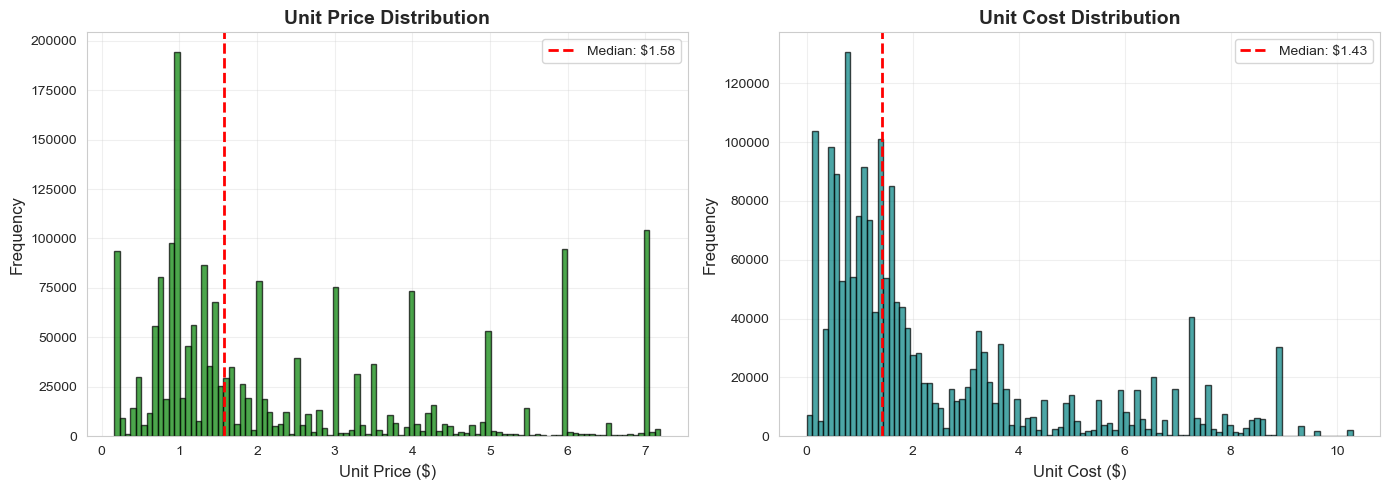

In [76]:
# Price Distribution
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(df['unit_price'], bins=100, color='green', edgecolor='black', alpha=0.7)
plt.axvline(df['unit_price'].median(), color='red', linestyle='--', linewidth=2, 
            label=f'Median: ${df["unit_price"].median():.2f}')
plt.xlabel('Unit Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Unit Price Distribution', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(df['unit_cost'], bins=100, color='teal', edgecolor='black', alpha=0.7)
plt.axvline(df['unit_cost'].median(), color='red', linestyle='--', linewidth=2, 
            label=f'Median: ${df["unit_cost"].median():.2f}')
plt.xlabel('Unit Cost ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Unit Cost Distribution', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

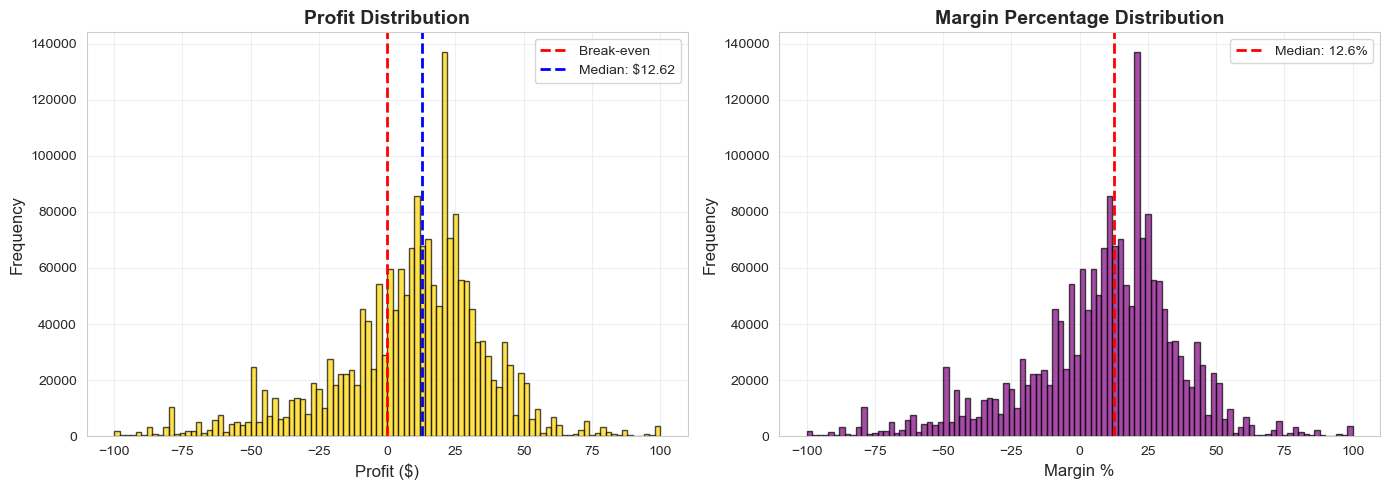

Profit Statistics:
  Positive profit transactions: 1,340,892 (69.9%)
  Negative profit transactions: 571,166 (29.8%)
  Total profit: $16,405,344.70


In [77]:
# Profit and Margin Distribution
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(df['profit'], bins=100, color='gold', edgecolor='black', alpha=0.7)
plt.axvline(0, color='red', linestyle='--', linewidth=2, label='Break-even')
plt.axvline(df['profit'].median(), color='blue', linestyle='--', linewidth=2, 
            label=f'Median: ${df["profit"].median():.2f}')
plt.xlabel('Profit ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Profit Distribution', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(df['margin_pct'], bins=100, color='purple', edgecolor='black', alpha=0.7)
plt.axvline(df['margin_pct'].median(), color='red', linestyle='--', linewidth=2, 
            label=f'Median: {df["margin_pct"].median():.1f}%')
plt.xlabel('Margin %', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Margin Percentage Distribution', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Profit statistics
print(f"Profit Statistics:")
print(f"  Positive profit transactions: {(df['profit'] > 0).sum():,} ({(df['profit'] > 0).sum()/len(df)*100:.1f}%)")
print(f"  Negative profit transactions: {(df['profit'] < 0).sum():,} ({(df['profit'] < 0).sum()/len(df)*100:.1f}%)")
print(f"  Total profit: ${df['profit'].sum():,.2f}")

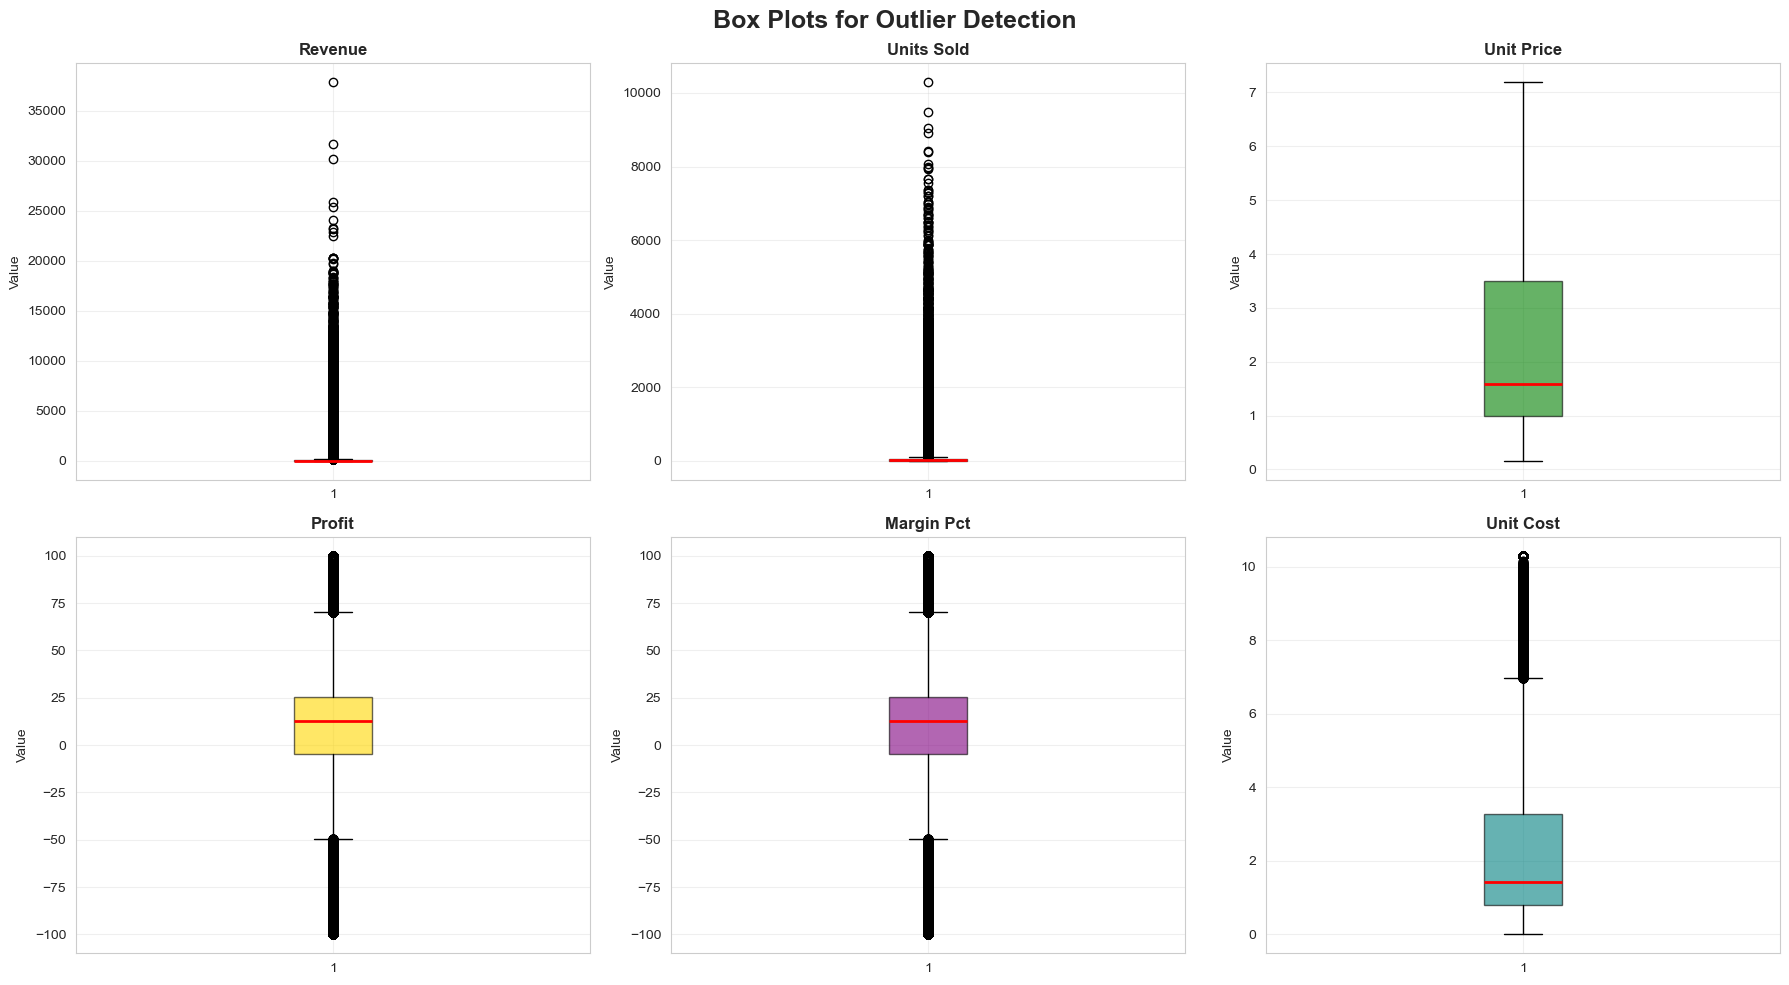

In [78]:
# Outlier detection box plot
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Box Plots for Outlier Detection', fontsize=18, fontweight='bold')

numerical_vars = ['revenue', 'units_sold', 'unit_price', 'profit', 'margin_pct', 'unit_cost']
colors = ['steelblue', 'coral', 'green', 'gold', 'purple', 'teal']

for idx, (var, color) in enumerate(zip(numerical_vars, colors)):
    row = idx // 3
    col = idx % 3
    bp = axes[row, col].boxplot(df[var].dropna(), patch_artist=True, 
                                  boxprops=dict(facecolor=color, alpha=0.6),
                                  medianprops=dict(color='red', linewidth=2))
    axes[row, col].set_title(f'{var.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    axes[row, col].set_ylabel('Value')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

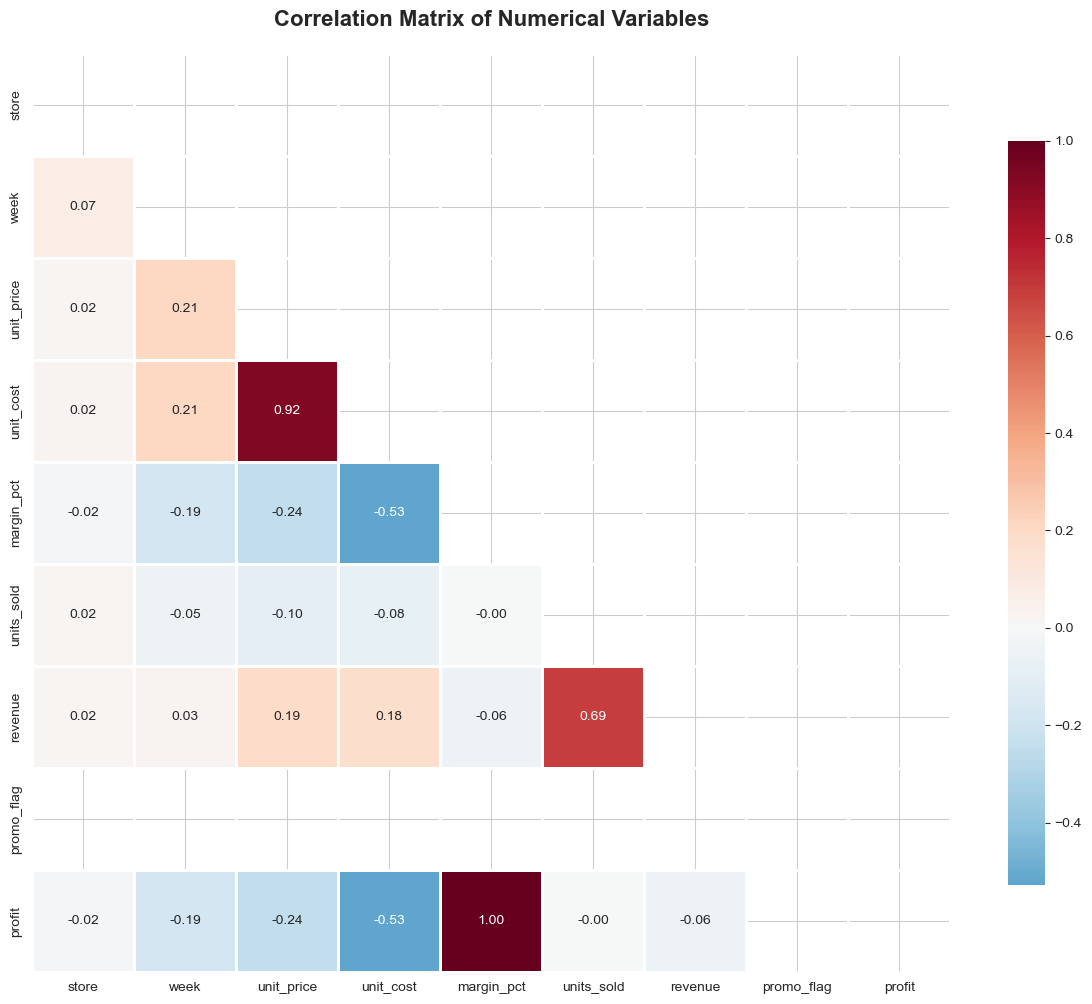

In [79]:
# Correlation Matrix
numerical_cols = ['store', 'week', 'unit_price', 'unit_cost', 'margin_pct', 
                  'units_sold', 'revenue', 'promo_flag', 'profit']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='RdBu_r', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

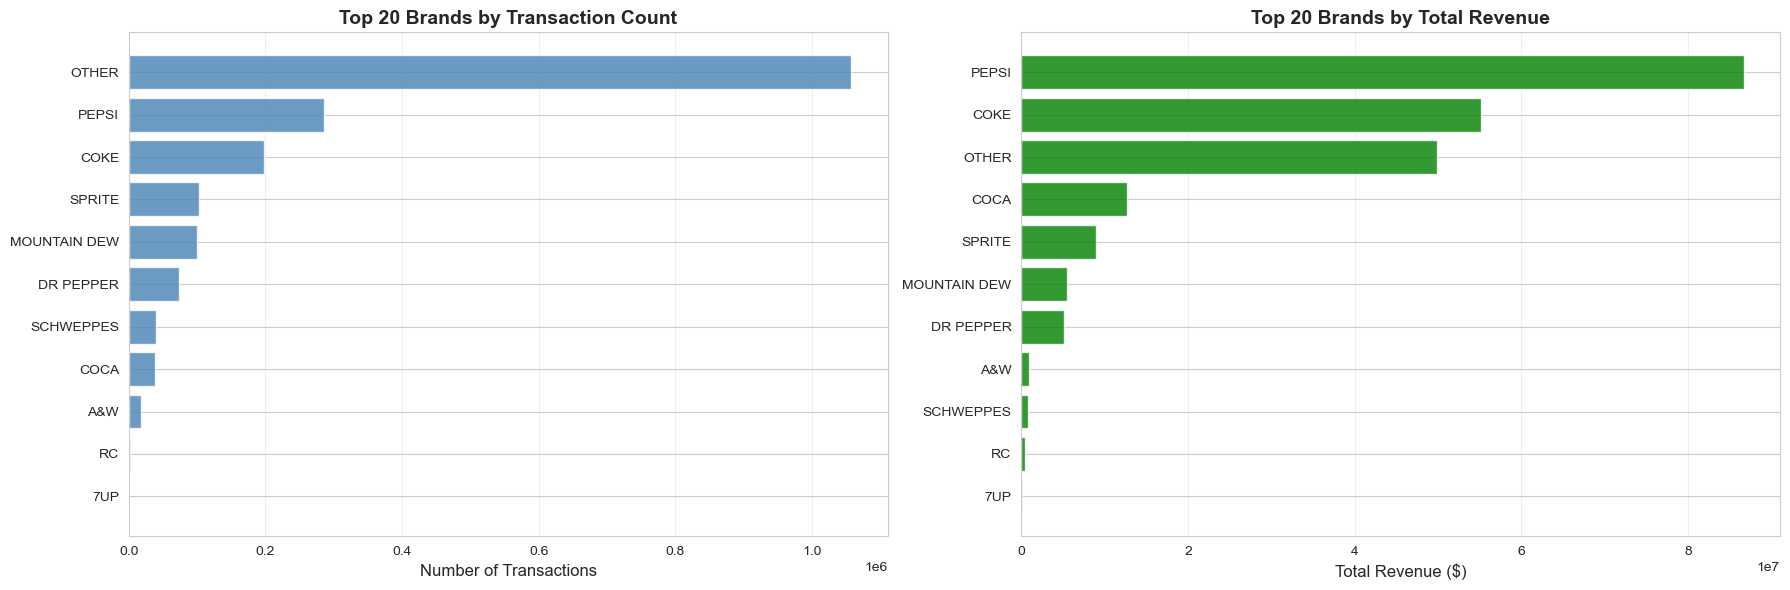

In [80]:
# Top Brands
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Top 20 brands by frequency
top_brands_count = df['brand'].value_counts().head(20)
axes[0].barh(range(len(top_brands_count)), top_brands_count.values, color='steelblue', alpha=0.8)
axes[0].set_yticks(range(len(top_brands_count)))
axes[0].set_yticklabels(top_brands_count.index, fontsize=10)
axes[0].set_xlabel('Number of Transactions', fontsize=12)
axes[0].set_title('Top 20 Brands by Transaction Count', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Top 20 brands by revenue
brand_revenue = df.groupby('brand')['revenue'].sum().sort_values(ascending=False).head(20)
axes[1].barh(range(len(brand_revenue)), brand_revenue.values, color='green', alpha=0.8)
axes[1].set_yticks(range(len(brand_revenue)))
axes[1].set_yticklabels(brand_revenue.index, fontsize=10)
axes[1].set_xlabel('Total Revenue ($)', fontsize=12)
axes[1].set_title('Top 20 Brands by Total Revenue', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [81]:
# Brand Performance table
brand_performance = df.groupby('brand').agg({
    'revenue': 'sum',
    'profit': 'sum',
    'units_sold': 'sum',
    'margin_pct': 'mean',
    'upc': 'count'
}).round(2)

brand_performance.columns = ['Total_Revenue', 'Total_Profit', 'Total_Units', 'Avg_Margin_%', 'Transactions']
brand_performance = brand_performance.sort_values('Total_Revenue', ascending=False).head(20)

display(brand_performance)

,Total_Revenue,Total_Profit,Total_Units,Avg_Margin_%,Transactions
brand,,,,,
PEPSI,"86,699,781.64","747,923.43",33368014,2.62,285694
COKE,"55,163,023.39","955,934.88",20107923,4.81,198556
OTHER,"49,935,705.60","13,764,676.88",44193515,13.01,1057739
COCA,"12,654,698.83","45,425.55",9032943,1.17,38670
SPRITE,"8,903,332.52","55,641.92",3873271,0.54,103074
MOUNTAIN DEW,"5,508,660.24","100,539.86",2172675,1.01,99974
DR PEPPER,"5,094,914.02","183,706.56",2619251,2.50,73378
A&W,"867,830.45","-22,983.75",215676,-1.25,18436
SCHWEPPES,"857,393.79","550,990.96",858668,13.69,40258


In [83]:
# Aggregate by date
time_agg = df.groupby(df['timestamp'].dt.date).agg({
    'revenue': 'sum',
    'units_sold': 'sum',
    'profit': 'sum'
}).reset_index()
time_agg['timestamp'] = pd.to_datetime(time_agg['timestamp'])

print(f"Time period: {time_agg['timestamp'].min()} to {time_agg['timestamp'].max()}")
print(f"Total days: {len(time_agg)}")

Time period: 1989-09-14 00:00:00 to 1997-05-01 00:00:00
Total days: 390


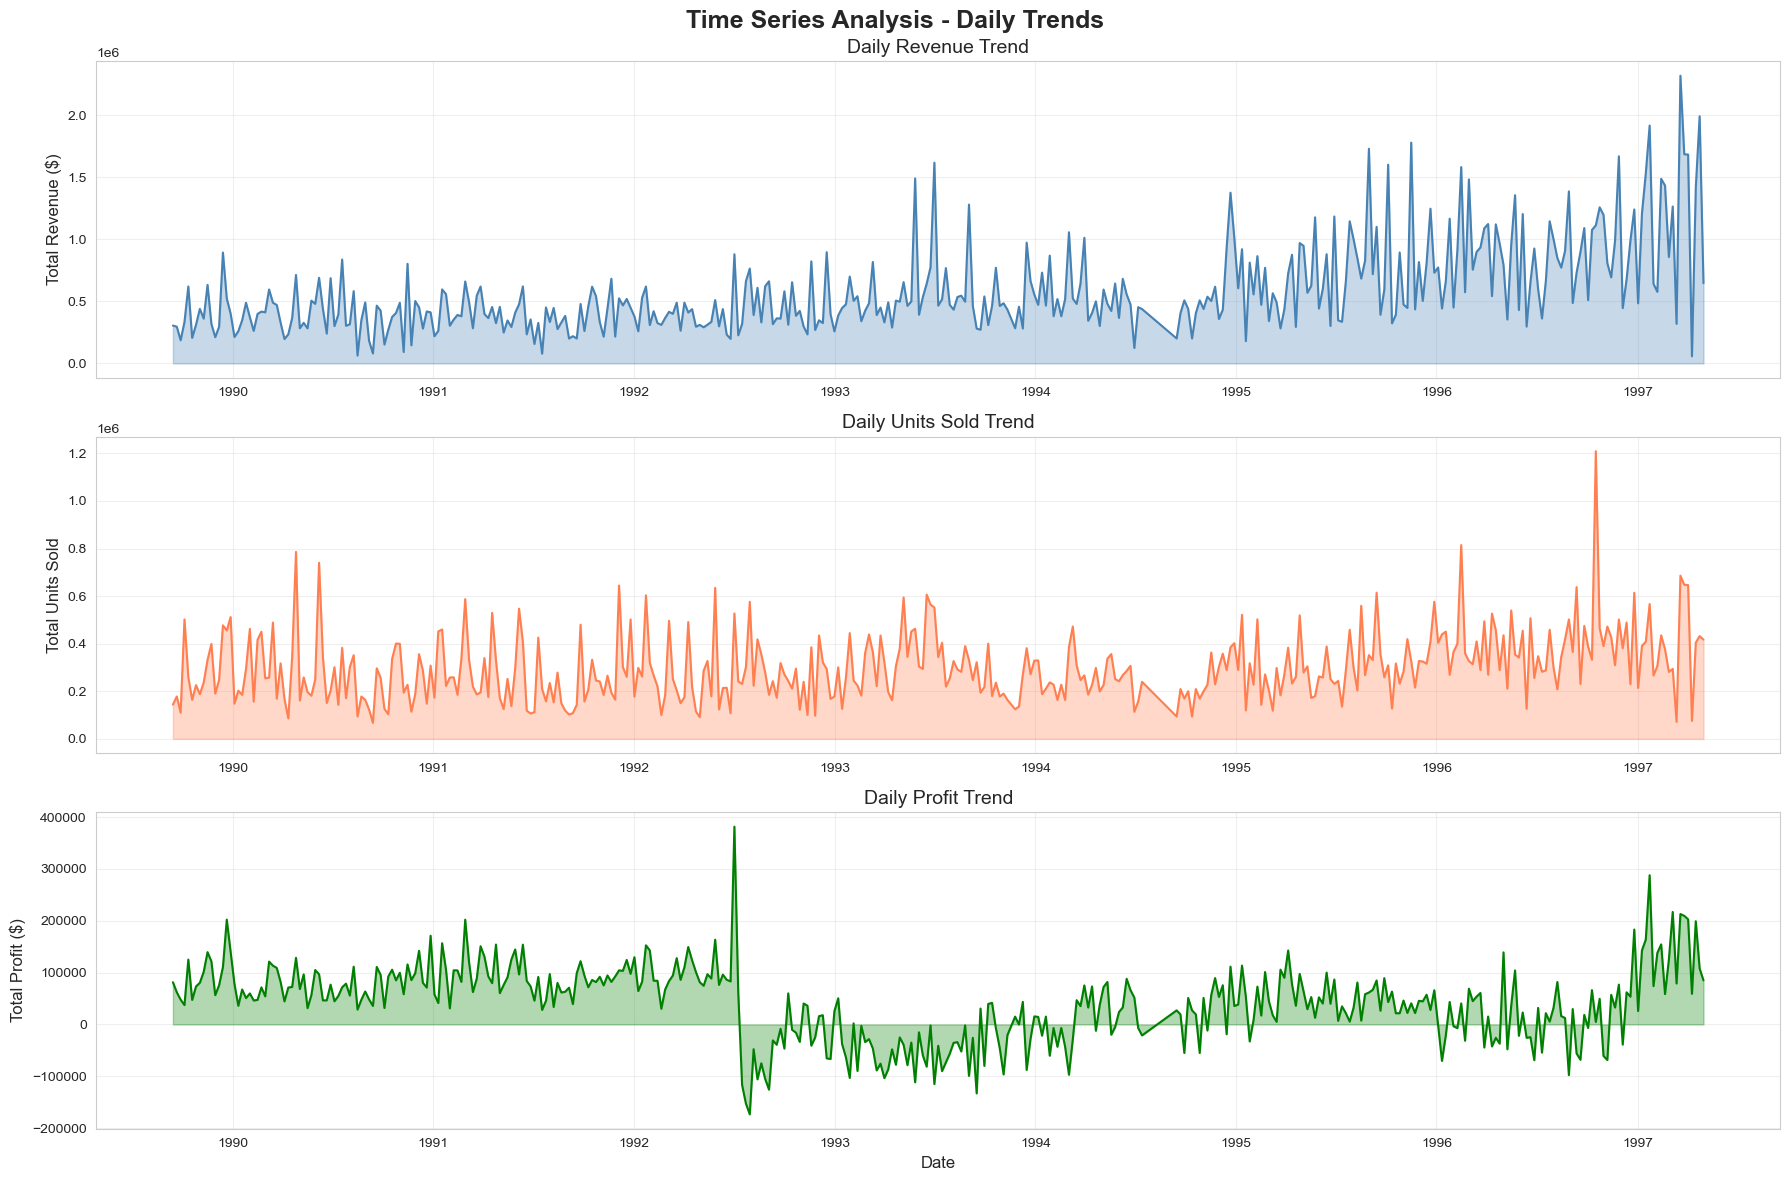

In [84]:
fig, axes = plt.subplots(3, 1, figsize=(18, 12))
fig.suptitle('Time Series Analysis - Daily Trends', fontsize=18, fontweight='bold')

# Revenue over time
axes[0].plot(time_agg['timestamp'], time_agg['revenue'], color='steelblue', linewidth=1.5)
axes[0].fill_between(time_agg['timestamp'], time_agg['revenue'], alpha=0.3, color='steelblue')
axes[0].set_ylabel('Total Revenue ($)', fontsize=12)
axes[0].set_title('Daily Revenue Trend', fontsize=14)
axes[0].grid(True, alpha=0.3)

# Units sold over time
axes[1].plot(time_agg['timestamp'], time_agg['units_sold'], color='coral', linewidth=1.5)
axes[1].fill_between(time_agg['timestamp'], time_agg['units_sold'], alpha=0.3, color='coral')
axes[1].set_ylabel('Total Units Sold', fontsize=12)
axes[1].set_title('Daily Units Sold Trend', fontsize=14)
axes[1].grid(True, alpha=0.3)

# Profit over time
axes[2].plot(time_agg['timestamp'], time_agg['profit'], color='green', linewidth=1.5)
axes[2].fill_between(time_agg['timestamp'], time_agg['profit'], alpha=0.3, color='green')
axes[2].set_ylabel('Total Profit ($)', fontsize=12)
axes[2].set_xlabel('Date', fontsize=12)
axes[2].set_title('Daily Profit Trend', fontsize=14)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [85]:
# Extract time features
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['quarter'] = df['timestamp'].dt.quarter
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['week_of_year'] = df['timestamp'].dt.isocalendar().week

print("Time features created successfully!")
df[['timestamp', 'year', 'month', 'quarter', 'day_of_week', 'week_of_year']].head()

Time features created successfully!


,timestamp,year,month,quarter,day_of_week,week_of_year
0,1995-05-18,1995,5,2,3,20
1,1996-07-11,1996,7,3,3,28
2,1996-08-15,1996,8,3,3,33
3,1996-08-22,1996,8,3,3,34
4,1996-09-19,1996,9,3,3,38


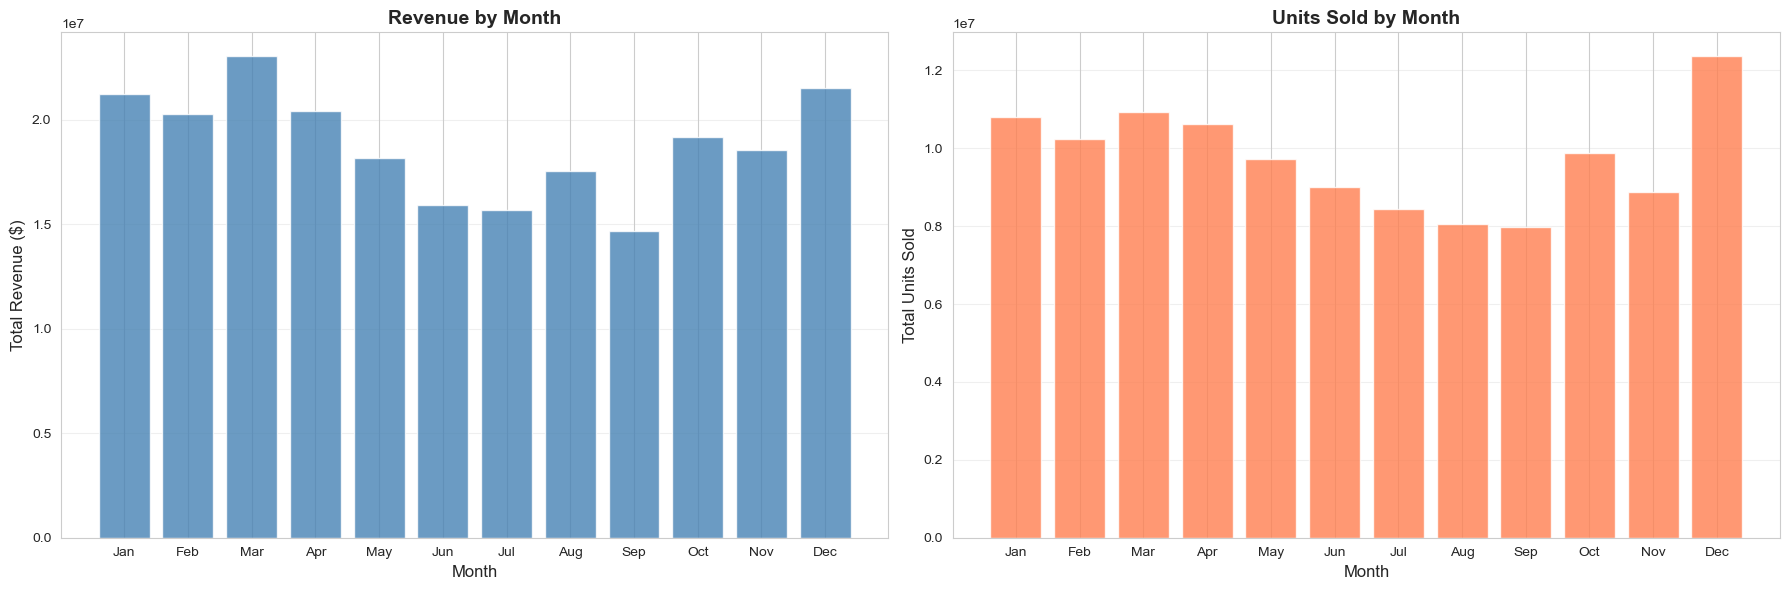

,revenue_sum,revenue_mean,units_sold_sum,units_sold_mean,profit_sum,profit_mean
month,,,,,,
1,"21,221,520.22",112.20,10806873,57.14,"1,808,041.87",9.56
2,"20,267,252.70",126.87,10229581,64.03,"1,502,786.57",9.41
3,"23,023,482.44",124.29,10940492,59.06,"2,182,588.60",11.78
4,"20,411,335.82",124.63,10620452,64.85,"1,962,939.62",11.99
5,"18,169,010.40",121.87,9716962,65.18,"1,596,375.80",10.71
6,"15,929,124.63",103.91,8996944,58.69,"1,342,819.00",8.76
7,"15,669,213.87",123.71,8453760,66.74,"131,151.53",1.04
8,"17,525,797.34",133.77,8047453,61.42,"469,952.37",3.59
9,"14,689,165.24",108.67,7982128,59.05,"483,662.80",3.58


In [86]:
monthly_agg = df.groupby('month').agg({
    'revenue': ['sum', 'mean'],
    'units_sold': ['sum', 'mean'],
    'profit': ['sum', 'mean']
}).round(2)

monthly_agg.columns = ['_'.join(col).strip() for col in monthly_agg.columns.values]

# Plot
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Monthly revenue
month_revenue = df.groupby('month')['revenue'].sum()
axes[0].bar(month_revenue.index, month_revenue.values, color='steelblue', alpha=0.8)
axes[0].set_xlabel('Month', fontsize=12)
axes[0].set_ylabel('Total Revenue ($)', fontsize=12)
axes[0].set_title('Revenue by Month', fontsize=14, fontweight='bold')
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[0].grid(axis='y', alpha=0.3)

# Monthly units sold
month_units = df.groupby('month')['units_sold'].sum()
axes[1].bar(month_units.index, month_units.values, color='coral', alpha=0.8)
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Total Units Sold', fontsize=12)
axes[1].set_title('Units Sold by Month', fontsize=14, fontweight='bold')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

display(monthly_agg)

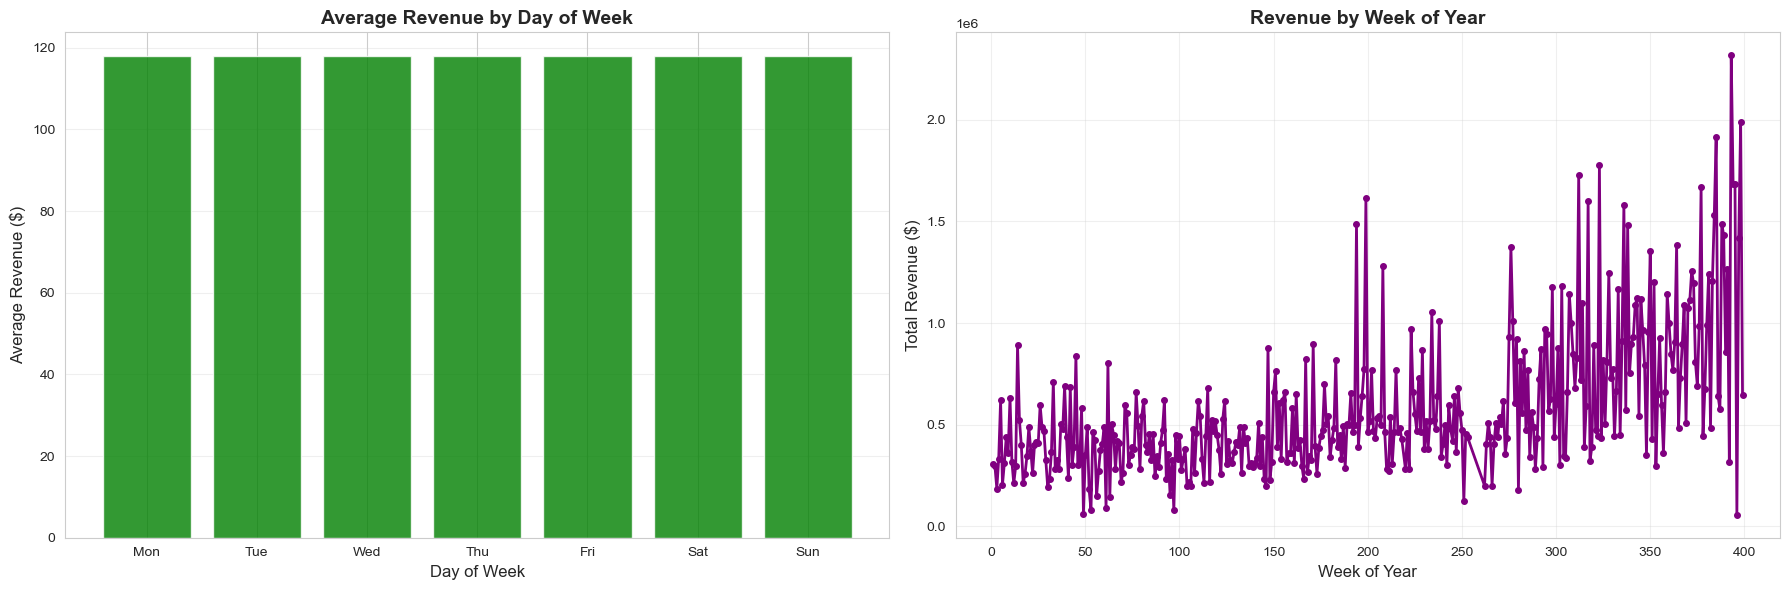

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Day of week revenue
dow_revenue = df.groupby('day_of_week')['revenue'].mean()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
axes[0].bar(range(7), dow_revenue.values, color='green', alpha=0.8)
axes[0].set_xlabel('Day of Week', fontsize=12)
axes[0].set_ylabel('Average Revenue ($)', fontsize=12)
axes[0].set_title('Average Revenue by Day of Week', fontsize=14, fontweight='bold')
axes[0].set_xticks(range(7))
axes[0].set_xticklabels(days)
axes[0].grid(axis='y', alpha=0.3)

# Weekly trend
weekly_revenue = df.groupby('week')['revenue'].sum()
axes[1].plot(weekly_revenue.index, weekly_revenue.values, color='purple', 
             linewidth=2, marker='o', markersize=4)
axes[1].set_xlabel('Week of Year', fontsize=12)
axes[1].set_ylabel('Total Revenue ($)', fontsize=12)
axes[1].set_title('Revenue by Week of Year', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()